<a href="https://colab.research.google.com/github/4ffan-x/Facial-expression-detection-model/blob/main/Facial_expression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import cv2
import os
from PIL import Image
from google.colab.patches import cv2_imshow
import zipfile
import matplotlib.image as mpimg
from tensorflow.keras import layers, models
import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
import pickle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download msambare/fer2013

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
fer2013.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
with zipfile.ZipFile('/content/fer2013.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [6]:
angry = os.listdir('/content/train/angry')
disgust = os.listdir('/content/train/disgust')

In [7]:
disgust[:10]

['Training_82298698.jpg',
 'Training_5459858.jpg',
 'Training_37638277.jpg',
 'Training_42237066.jpg',
 'Training_90401180.jpg',
 'Training_11753994.jpg',
 'Training_78735276.jpg',
 'Training_96754089.jpg',
 'Training_33653190.jpg',
 'Training_57530831.jpg']

In [8]:
angry[:10]

['Training_16882248.jpg',
 'Training_28012681.jpg',
 'Training_81736376.jpg',
 'Training_86876143.jpg',
 'Training_52281024.jpg',
 'Training_28029432.jpg',
 'Training_67196252.jpg',
 'Training_20916121.jpg',
 'Training_72167097.jpg',
 'Training_18966100.jpg']

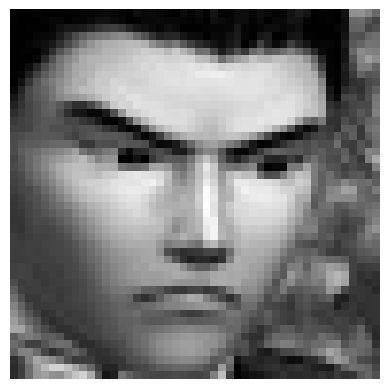

In [9]:
image = mpimg.imread('/content/train/angry/Training_16882248.jpg')
plt.imshow(image,cmap='gray')
plt.axis('off')
plt.show()

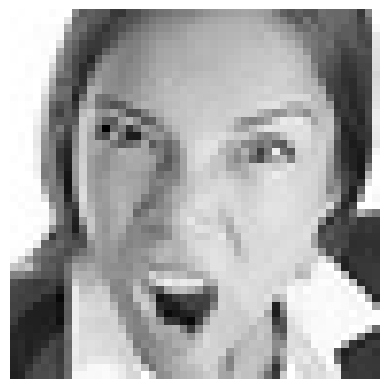

In [10]:
image = mpimg.imread('/content/train/angry/Training_28029432.jpg')
plt.imshow(image,cmap='gray')
plt.axis('off')
plt.show()

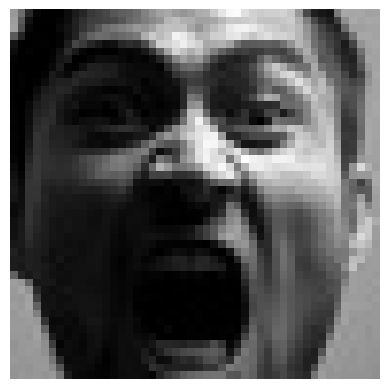

(48, 48)

In [11]:
image = mpimg.imread('/content/train/angry/Training_72167097.jpg')
plt.imshow(image,cmap = 'gray')
plt.axis('off')
plt.show()
image.shape

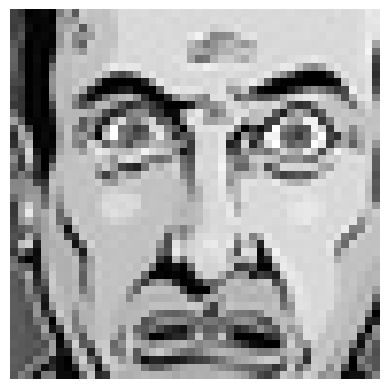

(48, 48)

In [12]:
image = mpimg.imread('/content/train/disgust/Training_42237066.jpg')
plt.imshow(image,cmap = 'gray')
plt.axis('off')
plt.show()
image.shape

In [13]:
len(angry),len(disgust)

(3995, 436)

In [14]:
classes = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [15]:
paths = []
for cls in classes:
    folder_path = "/content/train/" + cls
    paths.append(folder_path)
    images = os.listdir(folder_path)
    print(cls, ":", len(images))

angry : 3995
disgust : 436
fear : 4097
happy : 7215
neutral : 4965
sad : 4830
surprise : 3171


In [16]:
paths

['/content/train/angry',
 '/content/train/disgust',
 '/content/train/fear',
 '/content/train/happy',
 '/content/train/neutral',
 '/content/train/sad',
 '/content/train/surprise']

In [17]:
data = []
labels = []
for path in paths:
    label = path.split('/')[-1]

    for image_name in os.listdir(path):
        img_path = os.path.join(path, image_name)

        try:
            img = Image.open(img_path).resize((160,160)).convert('RGB')
            img = np.array(img)

            data.append(img)
            labels.append(label)

        except Exception as e:
            print(f"Error loading image: {img_path}")

In [18]:
labels[1]

'angry'

In [19]:
labels[-1]

'surprise'

In [20]:
len(data),len(labels)

(28709, 28709)

In [21]:
X = np.array(data)
y = np.array(labels)

In [22]:
from keras.src.utils import to_categorical
encoder = LabelEncoder()
labels = encoder.fit_transform(labels)
labels = to_categorical(labels)

In [23]:
encoder

LabelEncoder()

In [42]:
with open ('Facial_expression_model_encoder.pkl','wb') as f:
    pickle.dump(encoder,f)

In [24]:
labels[1]

array([1., 0., 0., 0., 0., 0., 0.])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state = 7,shuffle=True)

In [26]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state = 7,shuffle=True)

In [27]:
X_train.shape, X_test.shape

((18373, 160, 160, 3), (5742, 160, 160, 3))

In [28]:
y_train.shape, y_test.shape

((18373, 7), (5742, 7))

In [29]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# img_size = (160, 160)
# batch_size = 32

# datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# train_gen = datagen.flow_from_directory(
#     '/content/train',
#     target_size=img_size,
#     batch_size=batch_size,
#     class_mode='categorical',
#     subset='training',
#     shuffle=True
# )

# val_gen = datagen.flow_from_directory(
#     '/content/train',
#     target_size=img_size,
#     batch_size=batch_size,
#     class_mode='categorical',
#     subset='validation'
# )

array([[[ 95,  95,  95],
        [ 94,  94,  94],
        [ 92,  92,  92],
        ...,
        [163, 163, 163],
        [165, 165, 165],
        [167, 167, 167]],

       [[ 94,  94,  94],
        [ 93,  93,  93],
        [ 92,  92,  92],
        ...,
        [163, 163, 163],
        [166, 166, 166],
        [168, 168, 168]],

       [[ 92,  92,  92],
        [ 91,  91,  91],
        [ 91,  91,  91],
        ...,
        [164, 164, 164],
        [167, 167, 167],
        [169, 169, 169]],

       ...,

       [[249, 249, 249],
        [249, 249, 249],
        [250, 250, 250],
        ...,
        [249, 249, 249],
        [249, 249, 249],
        [249, 249, 249]],

       [[248, 248, 248],
        [248, 248, 248],
        [249, 249, 249],
        ...,
        [249, 249, 249],
        [249, 249, 249],
        [249, 249, 249]],

       [[247, 247, 247],
        [247, 247, 247],
        [249, 249, 249],
        ...,
        [249, 249, 249],
        [249, 249, 249],
        [249, 249, 249]]], dtype=uint8)
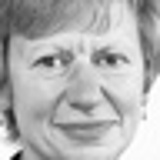

In [30]:
X_train[1]

In [31]:
from tensorflow.keras.applications import MobileNetV2

In [46]:
base_model = MobileNetV2(
    input_shape=(160, 160, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = True

In [33]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(7, activation='softmax')
])

In [34]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [35]:
lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
)

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (160, 160)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    '/content/train',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    '/content/train',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


In [43]:
from sklearn.utils import class_weight
import numpy as np

y_train_indices = train_gen.classes

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_indices),
    y=y_train_indices
)

class_weights = dict(enumerate(class_weights))
print(class_weights)


{0: np.float64(1.0266404434114071), 1: np.float64(9.401555464592715), 2: np.float64(1.0009587727708533), 3: np.float64(0.5684585684585685), 4: np.float64(0.826068191627104), 5: np.float64(0.8491570541259982), 6: np.float64(1.2933160650937552)}


In [44]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    class_weight=class_weights,
    callbacks=[lr]
)

Epoch 1/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 34s 38ms/step - accuracy: 0.6028 - loss: 1.1259 - val_accuracy: 0.4839 - val_loss: 1.3839 - learning_rate: 1.2500e-04
Epoch 2/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 24s 33ms/step - accuracy: 0.5980 - loss: 1.0862 - val_accuracy: 0.4760 - val_loss: 1.4026 - learning_rate: 1.2500e-04
Epoch 3/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.5946 - loss: 1.0753 - val_accuracy: 0.4865 - val_loss: 1.3754 - learning_rate: 1.2500e-04
Epoch 4/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 43s 33ms/step - accuracy: 0.6012 - loss: 1.0548 - val_accuracy: 0.4868 - val_loss: 1.3744 - learning_rate: 1.2500e-04
Epoch 5/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.6141 - loss: 1.0240 - val_accuracy: 0.4855 - val_loss: 1.3874 - learning_rate: 1.2500e-04
Epoch 6/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.6017 - loss: 1.0400 - val_accuracy: 0.4844 - val_loss: 1.3898 - learning_rate: 1.2500e-04
Epoch 7/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/ste

In [45]:
loss, accuracy = model.evaluate(val_gen)
print("Loss:", loss)
print("Accuracy:", accuracy)

180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.4928 - loss: 1.4009
Loss: 1.3938307762145996
Accuracy: 0.4905068874359131


In [41]:
with open ('Facial_expression_modelV1.pkl','wb') as f:
    pickle.dump(model,f)

In [ ]:
# model = keras.Sequential([
#     keras.layers.RandomFlip("horizontal"),
#     keras.layers.RandomRotation(0.1),
#     keras.layers.RandomTranslation(0.1, 0.1),

#     Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(48,48,1)),
#     BatchNormalization(),
#     Conv2D(64, (3,3), activation='relu', padding='same'),
#     BatchNormalization(),
#     MaxPool2D(pool_size=(2,2)),
#     Dropout(0.25),

#     Conv2D(128, (3,3), activation='relu', padding='same'),
#     BatchNormalization(),
#     Conv2D(128, (3,3), activation='relu', padding='same'),
#     BatchNormalization(),
#     MaxPool2D(pool_size=(2,2)),
#     Dropout(0.25),

#     Conv2D(256, (3,3), activation='relu', padding='same'),
#     BatchNormalization(),
#     Conv2D(256, (3,3), activation='relu', padding='same'),
#     BatchNormalization(),
#     MaxPool2D(pool_size=(2,2)),
#     Dropout(0.25),

#     Flatten(),
#     Dense(512, activation='relu'),
#     Dropout(0.4),
#     Dense(7, activation='softmax')
# ])

# model.summary()

In [ ]:
# datagen = tf.keras.preprocessing.image.ImageDataGenerator(
#     rotation_range=15,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     horizontal_flip=True
# )
# datagen.fit(X_train)

In [ ]:
# model.compile(
#     optimizer='adam',
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

In [ ]:
# history = model.fit(
#     X_train, y_train,
#     epochs=40,
#     batch_size=64,
#     validation_data=(X_val, y_val)
# )

In [ ]:
# loss , accuracy = model.evaluate(X_test, y_test)